## Observations and Insights 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
count_mice = len(combined_mouse_study["Mouse ID"].unique())
count_mice

249

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseid = combined_mouse_study.loc[combined_mouse_study.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouseid

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID.Show everything for that one mouse. 
show_duplicates = combined_mouse_study.duplicated(['Mouse ID',])
show_duplicates

0       False
1        True
2        True
3        True
4        True
        ...  
1888     True
1889     True
1890     True
1891     True
1892     True
Length: 1893, dtype: bool

In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_mice_study = combined_mouse_study.drop_duplicates("Mouse ID")
clean_combined_mice_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [12]:
# Checking the number of mice in the clean DataFrame.
clean_count_mice = len(combined_mouse_study["Mouse ID"].unique())
clean_count_mice

249

## Summary Statistics

In [17]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = combined_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = combined_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = pd.DataFrame({"Mean":mean, "Median":median, "Variance":variance, "Standard Deviation":standard_deviation, "SEM": sem})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [20]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_stats = summary_stats.agg("mean", "median", "variance", "standard deviation", "SEM", axis="columns")
agg_summary_stats

TypeError: aggregate() got multiple values for argument 'axis'

## Bar and Pie Charts

Text(0.5, 1.0, 'Total Drug Treatments')

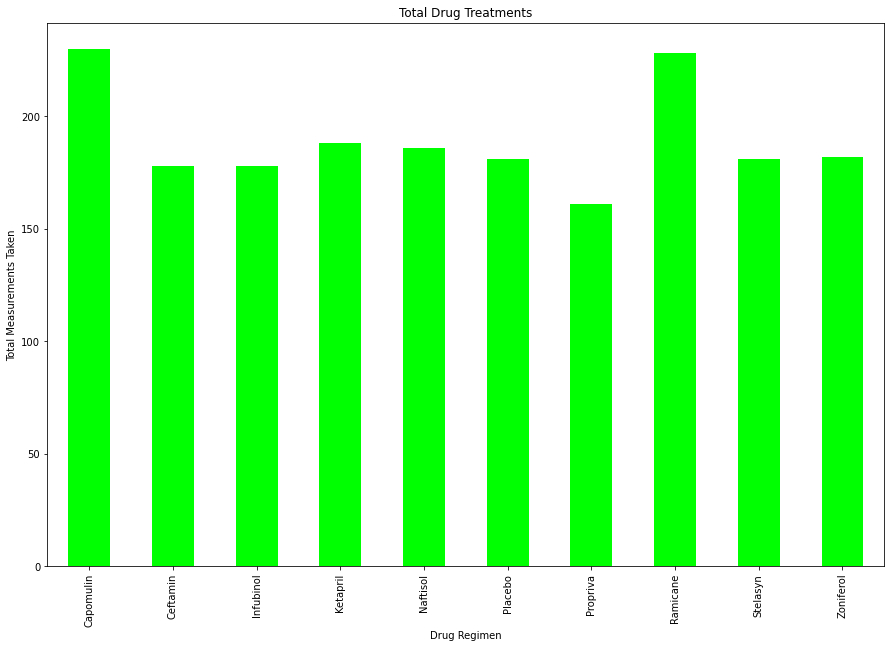

In [150]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bp_drugs = combined_mouse_study.groupby(["Drug Regimen"]).count()["Mouse ID"]

plot_pandas = bp_drugs.plot.bar(figsize=(15,10), color="lime")
bp_drugs

plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements Taken")
plt.title("Total Drug Treatments")

In [85]:
# Print drug list 
drugs = summary_stats.index.tolist()
drugs

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.


In [94]:
# Make drugs a list 
drug_count = (combined_mouse_study.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

Text(0, 0.5, 'Total Measurements Taken')

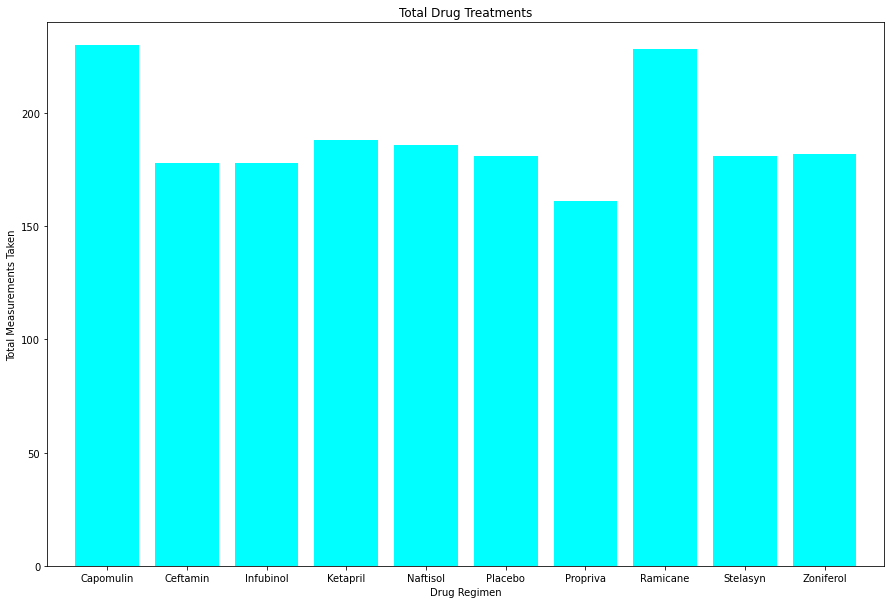

In [151]:
# Attempt 2 at pyplot bar

x_axis = np.arange(len(mice_drug))
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.bar(x_axis, drug_count, color='aqua', align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'])

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(drug_count)+10)


#Customize next Bar    
plt.title("Total Drug Treatments")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Measurements Taken")

In [41]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
bp_drugs = pd.DataFrame(combined_mouse_study.groupby(["Drug Regimen"]).count()).reset_index()

mice_drug = bp_drugs[["Drug Regimen", "Mouse ID"]]
mice_drug = bp_drugs.set_index("Drug Regimen")

# Bar via pyplot
matplotlib.pyplot.bar(x,height,width=0.8, bottom=None, align='center', data="Drug Regimen")

# x axis 

tick_locations = []
for x in x_axis:
    tick_locations.append(x)



NameError: name 'matplotlib' is not defined

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = pd.DataFrame(combined_mouse_study.groupby(["Sex"]).count()).reset_index()
mice_gender.head()

,Sex,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Female,935,935,935,935,935,935,935
1,Male,958,958,958,958,958,958,958


In [43]:
# Consolidate above output table to 2 columns
mice_gender = mice_gender[["Sex", "Mouse ID"]]
mice_gender.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

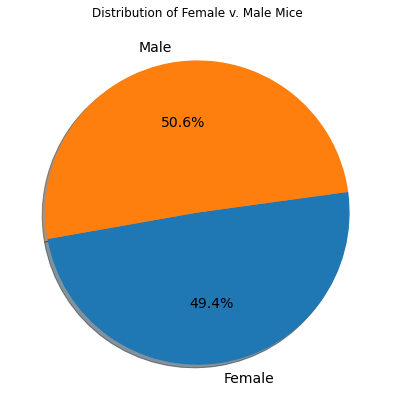

In [149]:
# Makin the pie chart using pandas
plt.figure(figsize=(15,10))
ax1= plt.subplot(121, aspect="equal")
mice_gender.plot(kind="pie", y="Mouse ID", ax=ax1, autopct='%1.1f%%', startangle=190, shadow=True, labels=mice_gender["Sex"], legend=False, fontsize=14)

plt.title("Distribution of Female v. Male Mice")
plt.xlabel("")
plt.ylabel("")

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mice_gender_count = (combined_mouse_study.groupby(["Sex"])["Age_months"].count()).tolist()
mice_gender_count

[935, 958]

(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

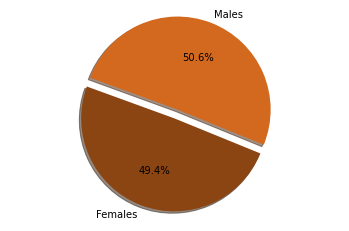

In [59]:
# Create pie
labels = ["Females", "Males"]
colors = ["saddlebrown", "chocolate"]
explode = (0.1, 0)

plt.pie(mice_gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
combined_mouse_study.head()

final_volume = combined_mouse_study.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"],ascending=True)
final_volume

# Start by getting the last (greatest) timepoint for each mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [61]:
# Table for Drug Regimen organized by Mouse ID
final_volume = combined_mouse_study.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"],ascending=True)
final_volume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
300,b128,Capomulin,Female,9,22,0,45.000000,0
301,b128,Capomulin,Female,9,22,5,45.651331,0
302,b128,Capomulin,Female,9,22,10,43.270852,0
303,b128,Capomulin,Female,9,22,15,43.784893,0
304,b128,Capomulin,Female,9,22,20,42.731552,0
...,...,...,...,...,...,...,...,...
1719,w575,Zoniferol,Female,16,28,45,68.401286,3
1774,x613,Zoniferol,Female,2,29,0,45.000000,0
1775,x613,Zoniferol,Female,2,29,5,46.097041,0
1776,x613,Zoniferol,Female,2,29,10,46.818176,0


In [71]:
# Table for Capomulin1 
final_vol_mouse = final_volume.loc[final_volume["Timepoint"] == 45]
final_vol_mouse.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,309,b128,Capomulin,Female,9,22,45,38.982878,2
1,299,b742,Capomulin,Male,7,21,45,38.939633,0
2,244,g288,Capomulin,Male,3,19,45,37.074024,1
3,360,g316,Capomulin,Female,22,22,45,40.159220,2
4,440,i557,Capomulin,Female,1,24,45,47.685963,1


In [80]:
# Table for Capomulin all
capomulin_mouse = final_vol_mouse[final_vol_mouse["Drug Regimen"].isin(["Capomulin"])]
capomulin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
309,b128,Capomulin,Female,9,22,45,38.982878,2
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
360,g316,Capomulin,Female,22,22,45,40.159220,2
440,i557,Capomulin,Female,1,24,45,47.685963,1
204,i738,Capomulin,Female,23,20,45,37.311846,2
337,j119,Capomulin,Female,7,23,45,38.125164,1
380,l509,Capomulin,Male,17,21,45,41.483008,3
282,l897,Capomulin,Male,17,19,45,38.846876,1
39,m601,Capomulin,Male,22,17,45,28.430964,1


In [140]:
capomulin_treatment = capomulin_mouse["Tumor Volume (mm3)"]

quartiles = capomulin_treatment.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The media is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliners.")

The lower quartile is: 32.37735684
The upper quartile is: 40.1592203
The interquartile range is: 7.781863460000004
The media is: 37.31184577
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliners.


In [76]:
# Table for Ramicane all
ramicane_mouse = final_vol_mouse[final_vol_mouse["Drug Regimen"].isin(["Ramicane"])]
ramicane_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
327,a411,Ramicane,Male,3,22,45,38.407618,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
214,a520,Ramicane,Male,13,21,45,38.810366,1
174,a644,Ramicane,Female,7,17,45,32.978522,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
272,d251,Ramicane,Female,8,19,45,37.311236,2
400,e662,Ramicane,Male,8,24,45,40.659006,2
49,g791,Ramicane,Male,11,16,45,29.128472,1
184,i177,Ramicane,Male,10,18,45,33.562402,3
254,i334,Ramicane,Female,8,20,45,36.374510,2


In [141]:
ramicane_treatment = ramicane_mouse["Tumor Volume (mm3)"]

quartiles = ramicane_treatment.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The media is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliners.")

The lower quartile is: 30.981175224999998
The upper quartile is: 38.508305307499995
The interquartile range is: 7.527130082499998
The media is: 34.848627300000004
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliners.


In [78]:
# Table for Infubinol all
infubinol_mouse = final_vol_mouse[final_vol_mouse["Drug Regimen"].isin(["Infubinol"])]
infubinol_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
463,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,Infubinol,Female,21,25,45,65.525743,1
540,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,Infubinol,Male,11,28,45,72.226731,2
800,e476,Infubinol,Male,23,26,45,62.435404,1
834,f345,Infubinol,Male,23,26,45,60.918767,1
1053,k483,Infubinol,Female,20,30,45,66.196912,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1872,z581,Infubinol,Female,24,25,45,62.754451,3


In [142]:
infubinol_treatment = infubinol_mouse["Tumor Volume (mm3)"]

quartiles = infubinol_treatment.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The media is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliners.")

The lower quartile is: 62.75445141
The upper quartile is: 67.68556862
The interquartile range is: 4.9311172099999965
The media is: 66.08306589
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliners.


In [79]:
# Table for Ceftamin all
ceftamin_mouse = final_vol_mouse[final_vol_mouse["Drug Regimen"].isin(["Ceftamin"])]
ceftamin_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
993,j296,Ceftamin,Female,24,30,45,61.849023,3
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
1132,l661,Ceftamin,Male,18,26,45,59.851956,3
1162,l733,Ceftamin,Female,4,30,45,64.299830,1
1260,o287,Ceftamin,Male,2,28,45,59.741901,4
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1773,x581,Ceftamin,Female,19,28,45,64.634949,3


In [143]:
ceftamin_treatment = ceftamin_mouse["Tumor Volume (mm3)"]

quartiles = ceftamin_treatment.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The media is: {quartiles[0.5]}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliners.")

The lower quartile is: 61.43389223
The upper quartile is: 67.52748237
The interquartile range is: 6.093590140000003
The media is: 64.29983003
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliners.


In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint




In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

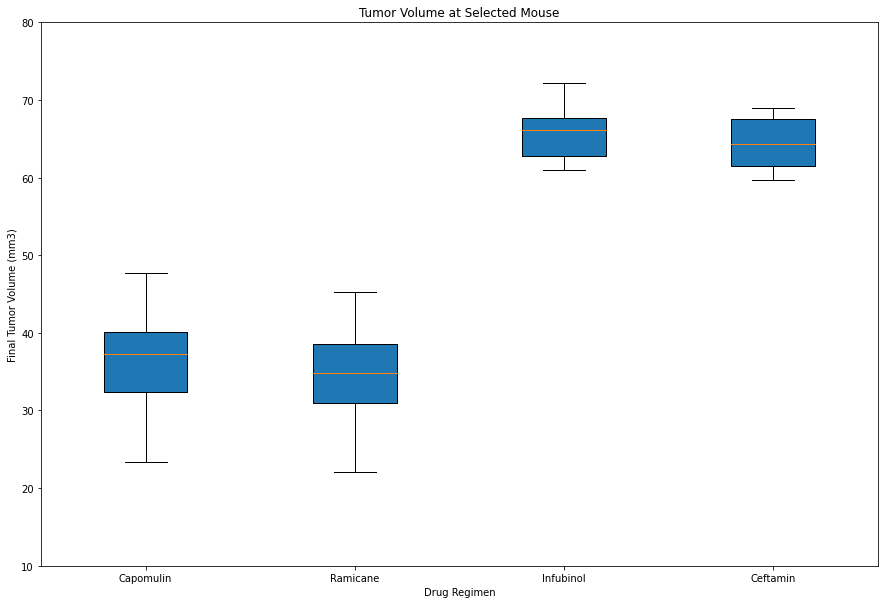

In [146]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
big_plot = [capomulin_treatment, ramicane_treatment, infubinol_treatment, ceftamin_treatment]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig1, ax1 = plt.subplots(figsize=(15,10))
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(big_plot, labels=Regimen, widths =0.4, patch_artist=True, vert=True)

plt.ylim(10,80)

plt.show()

## Line and Scatter Plots

In [100]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tumorvol_timept = final_volume.loc[final_volume["Mouse ID"] == "m957"]
tumorvol_timept.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
135,m957,Capomulin,Female,3,19,0,45.000000,0
136,m957,Capomulin,Female,3,19,5,45.622381,1
137,m957,Capomulin,Female,3,19,10,46.414518,1
138,m957,Capomulin,Female,3,19,15,39.804453,1
139,m957,Capomulin,Female,3,19,20,38.909349,1


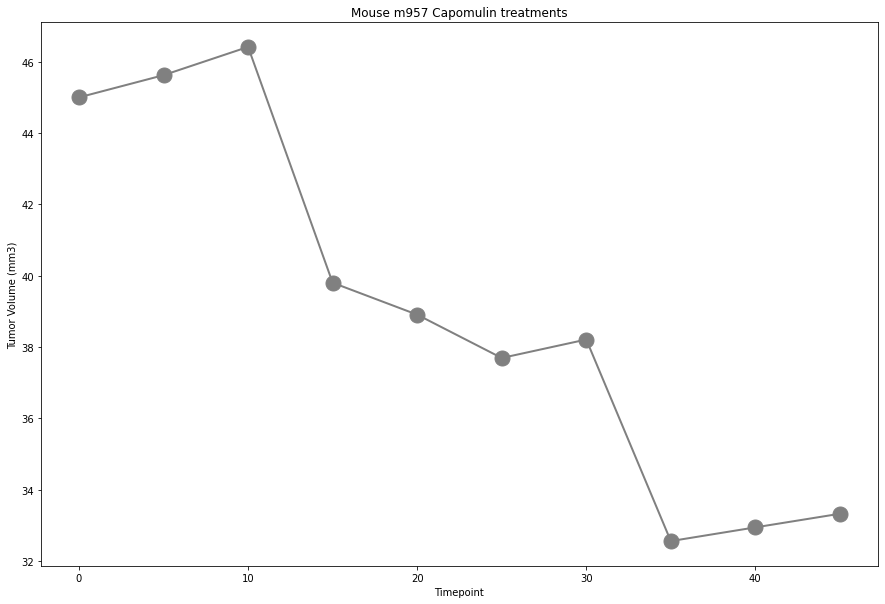

In [134]:
x_axis = tumorvol_timept["Timepoint"]
tumor_size = tumorvol_timept["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.title('Mouse m957 Capomulin treatments')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_axis, tumor_size, linewidth=2, markersize=15, marker="o", color='grey')

In [102]:
tumorvol_timept.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
135,m957,Capomulin,Female,3,19,0,45.000000,0
136,m957,Capomulin,Female,3,19,5,45.622381,1
137,m957,Capomulin,Female,3,19,10,46.414518,1
138,m957,Capomulin,Female,3,19,15,39.804453,1
139,m957,Capomulin,Female,3,19,20,38.909349,1


In [110]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tvolume_weight = capomulin_mouse.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
tvolume_weight.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
309,b128,22,38.982878
299,b742,21,38.939633
244,g288,19,37.074024
360,g316,22,40.159220
440,i557,24,47.685963


In [111]:
avg_tumor_volume = pd.DataFrame(tvolume_weight.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_tumor_volume

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,38.982878
1,b742,21,38.939633
2,g288,19,37.074024
3,g316,22,40.159220
4,i557,24,47.685963
5,i738,20,37.311846
6,j119,23,38.125164
7,l509,21,41.483008
8,l897,19,38.846876
9,m601,17,28.430964


In [112]:
avg_tumor_volume = avg_tumor_volume.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
avg_tumor_volume

,Mouse ID,Weight (g),Average Tumor Volume (mm3)
0,b128,22,38.982878
1,b742,21,38.939633
2,g288,19,37.074024
3,g316,22,40.159220
4,i557,24,47.685963
5,i738,20,37.311846
6,j119,23,38.125164
7,l509,21,41.483008
8,l897,19,38.846876
9,m601,17,28.430964


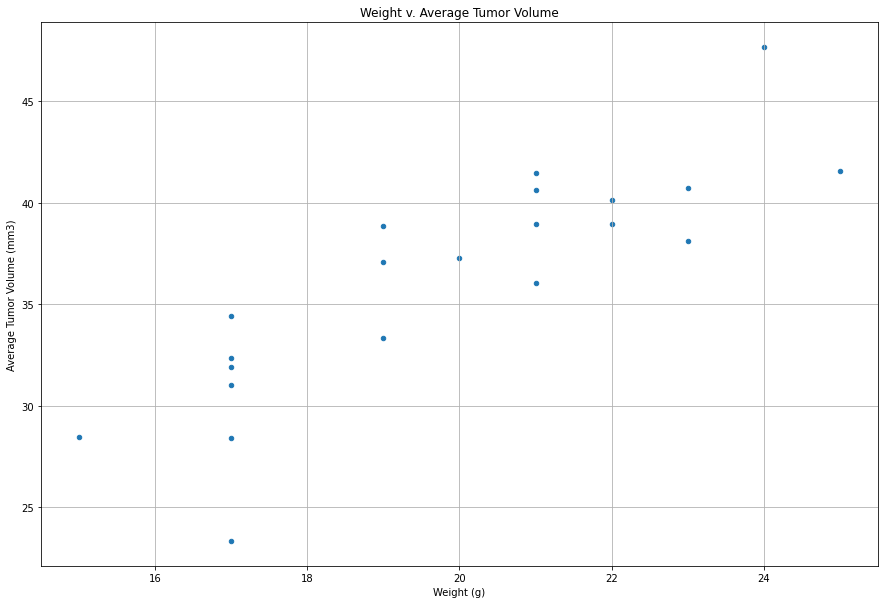

In [148]:
# Finally making the scatter plot 
avg_tumor_volume.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)", grid=True, figsize=(15,10), title="Weight v. Average Tumor Volume")
plt.show()

## Correlation and Regression

In [132]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight = avg_tumor_volume.iloc[:,0]
avg_tum_vol = avg_tumor_volume.iloc[:,1] 
correlation = st.pearsonr(mouse_weight,avg_tum_vol)
print(f"The correlation between mouse weight and average tumor volume is {round(correalation[0],2)}")

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [126]:
# Linear regression calculations 
x_values = avg_tumor_volume['Weight (g)']
y_values = avg_tumor_volume['Average Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

NameError: name 'linregress' is not defined

NameError: name 'regress_values' is not defined

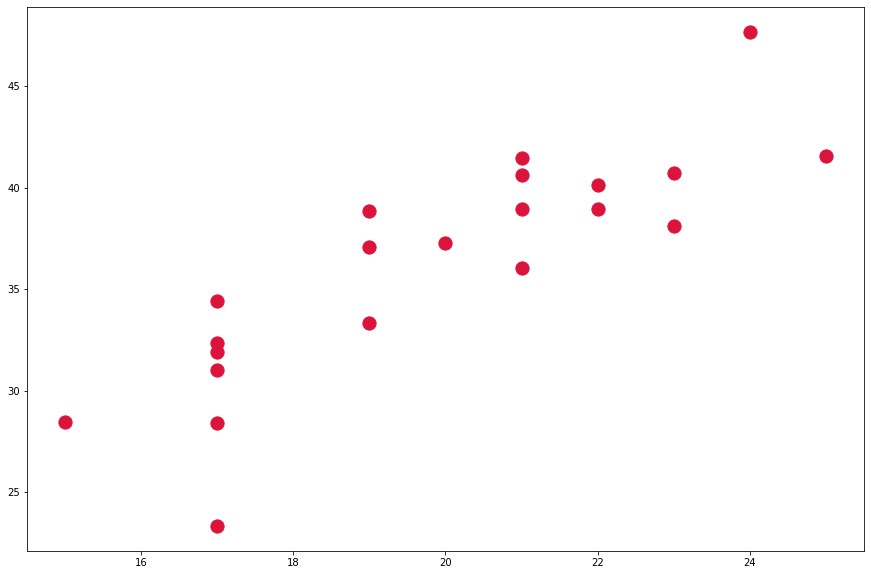

In [131]:
fig1, ax1 = plt.subplots(figsize=(15,10))
plt.scatter(x_values,y_values, s=175, color="crimson")
plt.plot(x_values,regress_values,"r-")

plt.title('Linear Regression of Mouse Weight v. Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.annotate(line_eq,(15,10), xy=(20,40), xycoords='data', xytext=(0.8, 0.95), textcoords='axes function', horizontalalignment='right',verticalalignment='top', fontsize=30, color="black")

print(f"The r-squared is: {rvalue**2}")

plt.show()